In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import torch

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('btcusd_1-min_data.csv')

C:\Users\wifqo\AppData\Local\Temp\ipykernel_33116\806621523.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('btcusd_1-min_data.csv')


## Exploratory Data Analysis

In [3]:
df.head()

,Timestamp,Open,High,Low,Close,Volume,datetime
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00+00:00
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00+00:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00+00:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00+00:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00+00:00


In [4]:
# Convert the 'Date' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

In [5]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume
count,7.008205e+06,7.008205e+06,7.008205e+06,7.008205e+06,7.008205e+06,7.008205e+06
mean,1.535659e+09,1.737403e+04,1.738098e+04,1.736687e+04,1.737403e+04,5.303707e+00
std,1.213868e+08,2.401468e+04,2.402270e+04,2.400646e+04,2.401466e+04,2.252397e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.430535e+09,4.242000e+02,4.243500e+02,4.240300e+02,4.242000e+02,1.814380e-02
50%,1.535658e+09,6.587830e+03,6.590610e+03,6.584380e+03,6.587800e+03,4.692601e-01
75%,1.640781e+09,2.726900e+04,2.727600e+04,2.726300e+04,2.726900e+04,3.035527e+00
max,1.745974e+09,1.091110e+05,1.093560e+05,1.087940e+05,1.090360e+05,5.853852e+03


In [6]:
df.isna().sum()

Timestamp         0
Open              0
High              0
Low               0
Close             0
Volume            0
datetime     225925
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008205 entries, 0 to 7008204
Data columns (total 7 columns):
 #   Column     Dtype              
---  ------     -----              
 0   Timestamp  float64            
 1   Open       float64            
 2   High       float64            
 3   Low        float64            
 4   Close      float64            
 5   Volume     float64            
 6   datetime   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 374.3 MB


In [8]:
df['datetime'].max()

Timestamp('2025-03-15 00:00:00+0000', tz='UTC')

In [9]:
# take the missing data
df_missing = df[df['datetime'].isna()]
df_missing.head()
# count the row
df_missing.shape[0]

225925

In [10]:
df[df['Close'].duplicated()]

,Timestamp,Open,High,Low,Close,Volume,datetime
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:02:00+00:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:03:00+00:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:04:00+00:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:05:00+00:00
5,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:06:00+00:00
...,...,...,...,...,...,...,...
7008200,1.745974e+09,94646.00,94646.00,94645.00,94646.00,0.012497,NaT
7008201,1.745974e+09,94645.00,94645.00,94535.00,94550.00,0.163483,NaT
7008202,1.745974e+09,94549.00,94556.00,94520.00,94520.00,0.862617,NaT
7008203,1.745974e+09,94504.00,94531.00,94504.00,94524.00,0.011822,NaT


In [11]:
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
datetime     0
dtype: int64

### Make new daily data

In [12]:
df_daily =  df.resample('D', on='datetime').agg({
    'High': 'max',
    'Low': 'min',
    'Volume': 'sum',
    'Open': 'first',
    'Close': 'last',}).reset_index()

In [13]:
df_daily.duplicated(subset=['datetime']).sum()

np.int64(0)

In [14]:
df_daily.isna().sum()

datetime    0
High        0
Low         0
Volume      0
Open        0
Close       0
dtype: int64

In [15]:
# change datetime to date
df_daily['datetime'] = df_daily['datetime'].dt.date
df_daily['datetime'] = pd.to_datetime(df_daily['datetime'])

In [23]:
df['datetime'] = df['datetime'].dt.date
df['datetime'] = pd.to_datetime(df['datetime'])

Timestamp('2025-03-15 00:00:00')

## Data Visualization

In [16]:
#plt.figure(figsize=(20, 10))
#plt.plot(df['datetime'], df['Close'], label='Close Price', linewidth=1)
#plt.title('BTC/USD Close Price in minutes')

Text(0.5, 1.0, 'BTC/USD Close Price in days')

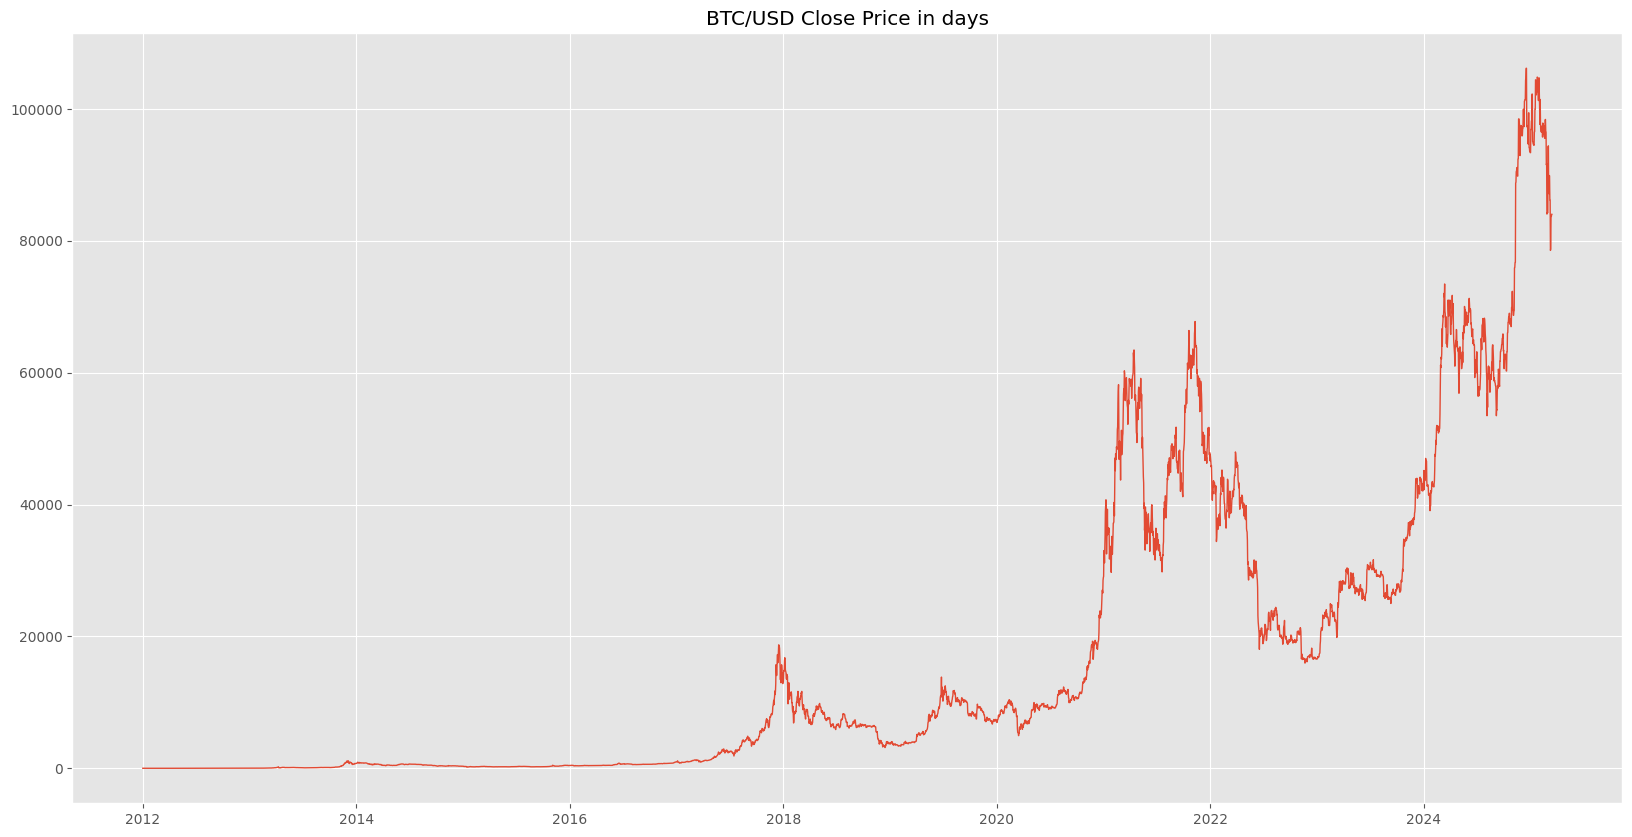

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(df_daily['datetime'], df_daily['Close'], label='Close Price', linewidth=1)
plt.title('BTC/USD Close Price in days')

In [18]:
df_daily

,datetime,High,Low,Volume,Open,Close
0,2012-01-01,4.84,4.58,10.000000,4.58,4.84
1,2012-01-02,5.00,4.84,10.100000,4.84,5.00
2,2012-01-03,5.32,5.00,107.085281,5.00,5.29
3,2012-01-04,5.57,4.93,107.233260,5.29,5.57
4,2012-01-05,6.46,5.57,70.328742,5.57,6.42
...,...,...,...,...,...,...
4818,2025-03-11,78818.00,78576.00,24.694112,78599.00,78763.00
4819,2025-03-12,84437.00,80607.00,1914.379561,81543.00,83620.00
4820,2025-03-13,83677.00,83677.00,0.000533,83677.00,83677.00
4821,2025-03-14,85294.00,82006.00,1741.192151,82006.00,83975.00
